###What is Out-Of-Bag (OOB) data?
* In ensemble methods like Random Forest, the model is built using bootstrapping.

* Bootstrapping is a sampling technique where subsets of the training data are sampled with replacement. This means that, for each individual tree in the forest, some of the data points from the training set will not be included in that tree's training process.

* These excluded data points are called Out-Of-Bag points (OOB).

###For example,
* if you have 1000 training samples, each tree might be trained on a bootstrap sample of 1000 samples,

* but around 36.8% of the samples from the original training set will not be included in each individual tree (since they are chosen randomly and with replacement).

* These remaining 36.8% of the samples are considered "Out-Of-Bag" for that tree.

###How Does OOB Score Work?
* Training Phase: Each tree in the random forest is trained on a bootstrap sample, meaning some data points are left out of the training process for that specific tree.
* Out-Of-Bag Points: The data points that were left out of each tree's training set are referred to as "Out-Of-Bag" points for that tree.
* Prediction: After each tree is trained, you can use the OOB points (the ones not included in the training of the tree) to evaluate the model. Each OOB point is predicted by all the trees that did not see it during training.
* OOB Score: The final OOB score is the average of the predictions for all OOB points from all trees. It serves as an unbiased estimate of the model's performance on unseen data.

# Problem Statement
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by
"National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us
to perform this prediction.

Constraints on data collection
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage

# Dataset:
https://www.kaggle.com/kumargh/pimaindiansdiabetescsv

# 1. Import Libraries and load dataset

In [29]:
#Import all the necessary modules
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns


In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
pima_df = pd.read_csv('/content/drive/MyDrive/0.Latest_DS_Course/Ensemble/1.Bagging/pima-indians-diabetes.csv')

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number
of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma
separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What
information is available about the data.

# 2. Print 10 samples from the dataset

In [32]:
pima_df.head(10)
#0s signify a lot of missing values

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# 3. Print the datatypes of each column and the shape of the dataset

In [33]:
pima_df.shape

(768, 9)

In [34]:
pima_df.dtypes

,0
Preg,int64
Plas,int64
Pres,int64
skin,int64
test,int64
mass,float64
pedi,float64
age,int64
class,int64


In [35]:
# Check for missing values
print("\nMissing values in the dataset:")
print(pima_df.isnull().sum())


Missing values in the dataset:
Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64


In [36]:
# Display basic statistics of the dataset
print("\nBasic statistics of the dataset:")
print(pima_df.describe())


Basic statistics of the dataset:
             Preg        Plas        Pres        skin        test        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.24375

There are '0's in the data. Are they really valid '0's or they are missing values? Plasma, BP, skin thickness etc. these values
cannot be 0. look at column by column logically to understand this.

# 4. Replace all the 0s in the column with the median of the same column value accordingly.

In [37]:
pima_df.loc[pima_df.Plas == 0, 'Plas'] = pima_df.Plas.median()
pima_df.loc[pima_df.Pres == 0, 'Pres'] = pima_df.Pres.median()
pima_df.loc[pima_df.skin == 0, 'skin'] = pima_df.skin.median()
pima_df.loc[pima_df.test == 0, 'test'] = pima_df.test.median()
pima_df.loc[pima_df.mass == 0, 'mass'] = pima_df.mass.median()

# 5. Print the descriptive statistics of each & every column using describe() function

In [38]:
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
Pres,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
skin,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
test,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
mass,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# 6. See the distribution of 'Class' variable and plot it using appropriate graph

In [39]:
pima_df.groupby("class").agg({'class': 'count'})

,class
class,
0,500
1,268


# 7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables

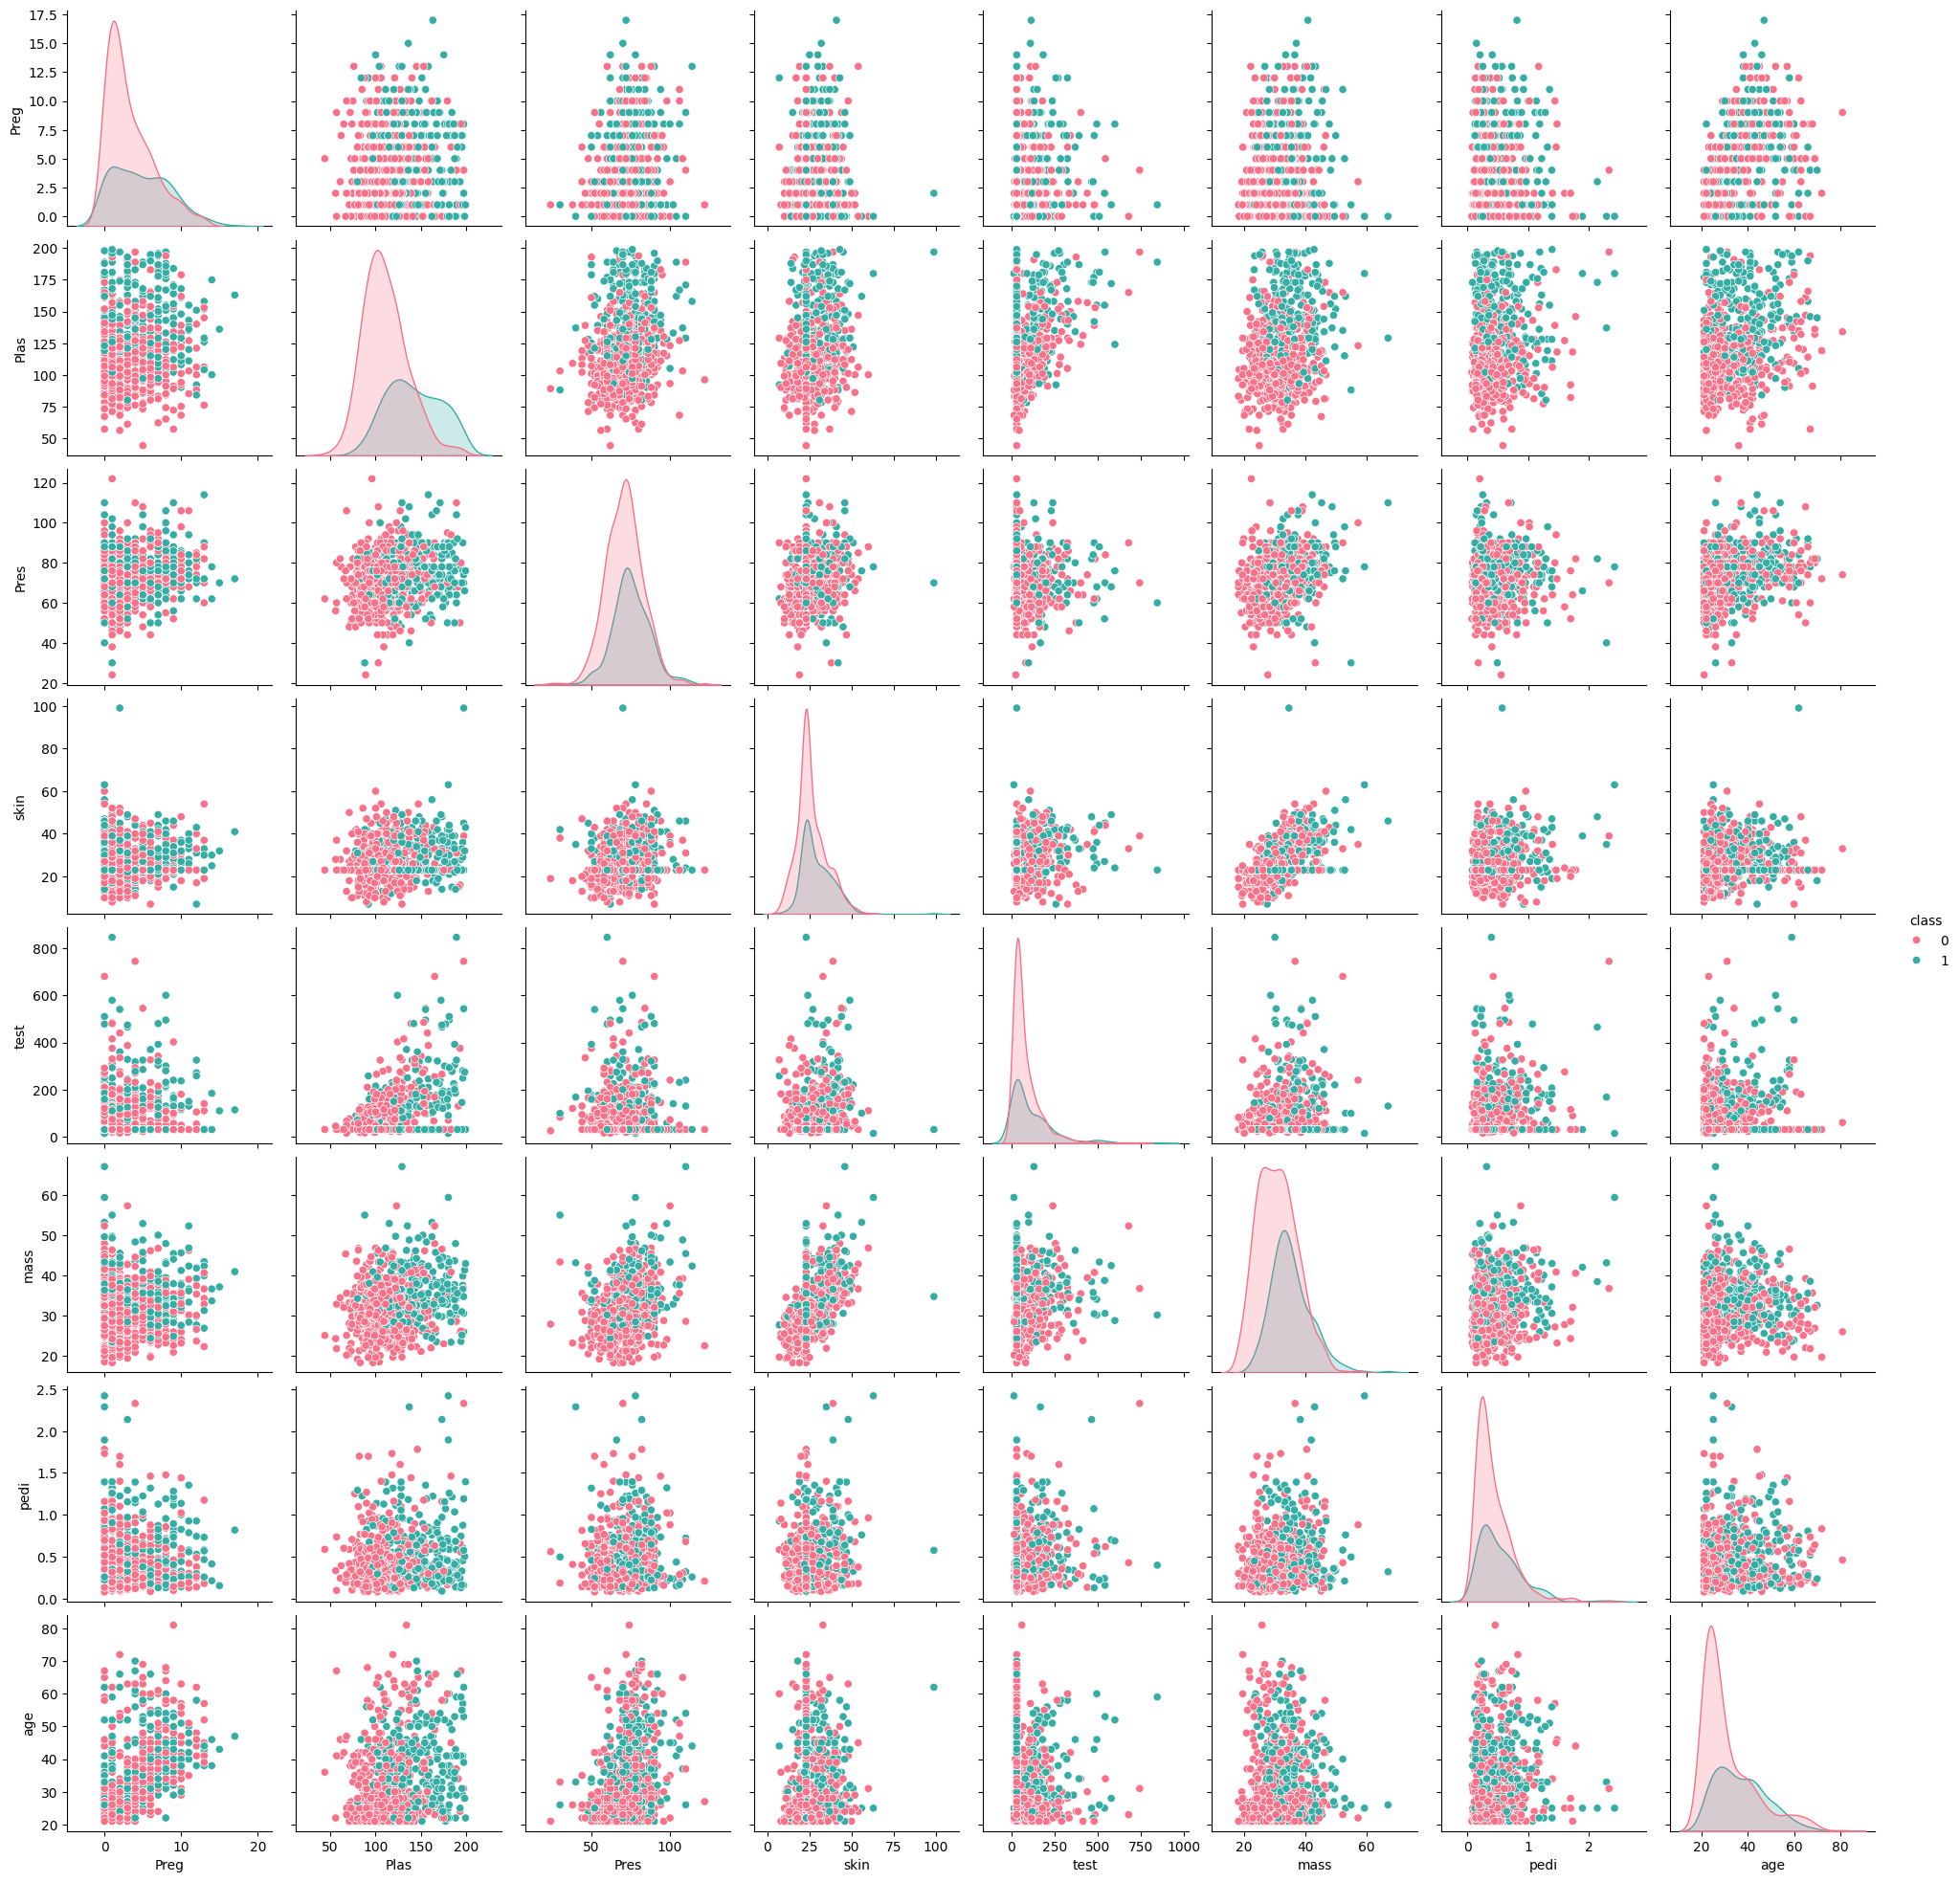

In [40]:
import seaborn as sns
sns.pairplot(pima_df, hue="class", palette="husl")

In [41]:
pima_df.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Plas,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
Pres,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
skin,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
test,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
mass,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
pedi,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
class,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


Check for correlation between variables whose values are >0.8

Observations:

Diagonal plots have already been discussed in the Observations I of Univariate Analysis.
There are no linear relationships between any two variables.
There is no strong correlation between any two variables.
There is no strong correlation between any independent variable and class variable.

Using the plot - infer the relationship between different variables

# 8. Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).

In [42]:
# Split the data into features (X) and target (y)
from sklearn.model_selection import train_test_split
X = pima_df.drop("class", axis=1)
y = pima_df["class"]



In [43]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
# Check the shape of the training and testing sets
print("\nShape of the training and testing sets:")
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


Shape of the training and testing sets:
(614, 8) (154, 8) (614,) (154,)


# 9. Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

# 10. Print the accuracy of the model & print the confusion matrix

In [46]:
dt_model.score(X_test , y_test)
test_pred = dt_model.predict(X_test)

In [47]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))#Print the feature importance of the decision model

           Imp
Preg  0.098291
Plas  0.265796
Pres  0.113391
skin  0.039349
test  0.075949
mass  0.129629
pedi  0.110822
age   0.166773


# 11. Apply the Random forest model and print the accuracy of Random forest Model

In [48]:
# Create the RandomForestClassifier with OOB score enabled
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True)
rf_classifier = RandomForestClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, n_estimators=100, random_state=42, oob_score=True)
# rfcl = RandomForestClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5)


# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.5, 1: 0.5}, criterion='entropy',
                       oob_score=True, random_state=42)

In [49]:
print(f"OOB Score: {rf_classifier.oob_score_:.4f}")


OOB Score: 0.7720


In [50]:

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nModel Evaluation:")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Model Evaluation:
Accuracy: 0.7792207792207793
Confusion Matrix:
 [[81 18]
 [16 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83        99
           1       0.68      0.71      0.70        55

    accuracy                           0.78       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154



* **If the OOB score ≈ Test accuracy, your model is likely well-generalized.**

* **If OOB score > Test accuracy, you might be overfitting slightly.**

* **If OOB score < Test accuracy, your test set may be easier or more similar to the training set.**

In [52]:

# Print feature importance
feature_importances = rf_classifier.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(importance_df)


Feature Importances:
  Feature  Importance
1    Plas    0.257736
5    mass    0.172081
7     age    0.140088
6    pedi    0.118919
2    Pres    0.091556
4    test    0.074483
3    skin    0.073082
0    Preg    0.072054


In [53]:
# Make a prediction for one of the records in the test set
test_record_index = 0
test_record = X_test.iloc[test_record_index].values.reshape(1, -1) # here -1 is a placeholder that tells numpy to guess the dimension so overall shape remains consistent
# example :
#  np.arange(6).reshape(2,-1)
expected_value = y_test.iloc[test_record_index]
predicted_value = rf_classifier.predict(test_record)[0]

print("\nPrediction for one of the records in the test set:")
print("Expected Value:", expected_value)
print("Predicted Value:", predicted_value)


Prediction for one of the records in the test set:
Expected Value: 0
Predicted Value: 0


In [54]:
# Print the OOB score
print("\nOut-of-Bag Score:")
print(rf_classifier.oob_score_)


Out-of-Bag Score:
0.7719869706840391
